In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.utils import shuffle

# ML
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


from sklearn.utils import shuffle 

## Generamos el código para poder pasarle un theta rectificado a la cinemática inversa

In [5]:
df1_10 = pd.read_csv('/content/data_orient10_MASTER_3.csv') #cinematica inversa
df2_10 = pd.read_csv('/content/data_orient10_MASTER_7.csv') #cinematica inversa
df3_10 = pd.read_csv('/content/data_orient10_MASTER.csv') #cinematica inversa
df4_10 = pd.read_csv('/content/data_orient10_MASTER_17.csv') #cinematica inversa

FileNotFoundError: [Errno 2] No such file or directory: '/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_orient10_MASTER.csv'

In [ ]:
df = pd.DataFrame() # Hacemos un dataframe para meter los valores de inclinacion y orientacion teoricos

In [ ]:
def preprocessColumnsIK(df_10):
  df = pd.DataFrame() ## Hacemos un dataframe para meter los valores de inclinacion y orientacion teoricos

  col_incli = ['I']
  col_orient = ['O']
  incli = []
  orient = []

  for i in range(5,36,5):
    for o in range(5,361,10):
      for repeat in range(100):
        incli.append(i)
        orient.append(o)

  #Convert the inclination and orientation to a df
  df['I'] = incli
  df['O'] = orient

  # Añadimos columnas a df renombradas 
  df['Inclination_sensor'] = df_10['Inclination']
  df['Orientation_sensor'] = df_10['Orientation'] 

  df['M1_IK']= df_10['M1'] 
  df['M2_IK']= df_10['M2'] 
  df['M3_IK']= df_10['M3'] 

  # Añadir errorres
  df['I_error'] = df['I'] - df['Inclination_sensor']
  df['O_error'] = df['O'] - df['Orientation_sensor']

  df['I_rectified'] = df['I'] + df['I_error']
  df['O_rectified'] = df['O'] + df['O_error']

  return df


In [ ]:
preprocessColumnsIK(df1_10)

,I,O,Inclination_sensor,Orientation_sensor,M1_IK,M2_IK,M3_IK,I_error,O_error,I_rectified,O_rectified
0,5,5,36.553769,180.264448,-0.015212,0.001406,0.002684,-31.553769,-175.264448,-26.553769,-170.264448
1,5,5,58.431080,180.704292,-0.042184,0.035793,0.029529,-53.431080,-175.704292,-48.431080,-170.704292
2,5,5,88.245258,180.662415,-0.092295,0.085008,0.078617,-83.245258,-175.662415,-78.245258,-170.662415
3,5,5,57.111907,180.900375,-0.159662,0.151353,0.145089,-52.111907,-175.900375,-47.111907,-170.900375
4,5,5,26.862205,180.686655,-0.246460,0.209005,0.223450,-21.862205,-175.686655,-16.862205,-170.686655
...,...,...,...,...,...,...,...,...,...,...,...
25195,35,355,31.774624,352.054034,-3.657010,2.880688,2.252523,3.225376,2.945966,38.225376,357.945966
25196,35,355,31.760524,352.067802,-3.655860,2.879154,2.247154,3.239476,2.932198,38.239476,357.932198
25197,35,355,31.762782,351.997803,-3.658161,2.875575,2.246771,3.237218,3.002197,38.237218,358.002197
25198,35,355,31.739652,352.079073,-3.658289,2.875831,2.247282,3.260348,2.920927,38.260348,357.920927


In [ ]:
df.to_csv('data_rectified__thetasIKMASTER_V1.csv')

## Con ayuda de las columnas I y O rectified, obtenemos un theta rectificado

In [ ]:
df_theta_rectified = pd.read_csv('data_rectified_thetasIK_MASTER_V1.csv.csv')

In [ ]:
df_theta_rectified

,M1_R,M2_R,M3_R
0,-4.872094,3.538265,4.384941
1,-2.511202,1.391536,1.740594
2,-0.501772,0.226344,0.296985
3,0.747953,-0.245522,-0.456786
4,-0.938727,0.497145,0.518574
...,...,...,...
25195,-4.261791,3.467463,2.926943
25196,-4.252734,3.452903,2.920653
25197,-4.255493,3.454180,2.925450
25198,-4.252447,3.462273,2.911483


In [ ]:

data_error_theta = pd.DataFrame()


In [ ]:
data_error_theta = pd.concat([df[['M1_IK','M2_IK','M3_IK']], df_theta_rectified], axis=1)

In [ ]:
data_error_theta['M1_error'] = data_error_theta['M1_IK'] - data_error_theta['M1_R']
data_error_theta['M2_error'] = data_error_theta['M2_IK'] - data_error_theta['M2_R']
data_error_theta['M3_error'] = data_error_theta['M3_IK'] - data_error_theta['M3_R']

In [ ]:
data_error_theta

,M1_IK,M2_IK,M3_IK,M1_R,M2_R,M3_R,M1_error,M2_error,M3_error
0,-0.004218,0.010610,0.006264,-4.872094,3.538265,4.384941,4.867876,-3.527655,-4.378677
1,-0.036304,0.040139,0.035921,-2.511202,1.391536,1.740594,2.474898,-1.351397,-1.704673
2,-0.085392,0.087309,0.084880,-0.501772,0.226344,0.296985,0.416380,-0.139034,-0.212104
3,-0.152248,0.153526,0.148924,0.747953,-0.245522,-0.456786,-0.900201,0.399048,0.605710
4,-0.239557,0.212584,0.229458,-0.938727,0.497145,0.518574,0.699170,-0.284560,-0.289116
...,...,...,...,...,...,...,...,...,...
25195,-3.655860,2.881327,2.252779,-4.261791,3.467463,2.926943,0.605931,-0.586136,-0.674164
25196,-3.658544,2.881327,2.246004,-4.252734,3.452903,2.920653,0.594190,-0.571575,-0.674649
25197,-3.655604,2.878004,2.246387,-4.255493,3.454180,2.925450,0.599889,-0.576176,-0.679063
25198,-3.657138,2.875319,2.253673,-4.252447,3.462273,2.911483,0.595309,-0.586954,-0.657810


## Prepara training dataset

In [214]:
# df1_10 = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_training_orient10_MASTER_3.csv') #cinematica inversa
df2_10 = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_training_orient10_MASTER_7.csv') #cinematica inversa
df3_10 = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_training_orient10_MASTER_17.csv') #cinematica inversa
df4_10 = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2023/data_february/data_training_orient10_MASTER_24.csv') #cinematica inversa

In [215]:
# Preparemos el dataset para entrenar el modelo con errores
data_model = pd.DataFrame()

In [216]:
data_model = pd.concat([df2_10, df3_10, df4_10])

In [217]:
import sklearn.utils 
data_model = sklearn.utils.shuffle(data_model) #aleatorizamos los datos

In [218]:
data_model

,I,O,I_error,O_error,M1_error,M2_error,M3_error
341,5,35,-1.119639,14.055978,-0.184490,0.104427,0.092318
16144,25,175,4.859415,1.395087,-0.679499,0.149784,0.213819
22394,35,75,2.932579,2.857412,-0.218089,0.306643,-0.346270
24619,35,305,1.948882,-2.144828,-0.062737,-0.289956,0.184967
7215,15,5,-1.108212,-1.459986,-0.115816,0.028087,0.127173
...,...,...,...,...,...,...,...
596,5,55,-0.750794,18.660503,-0.199561,0.101047,0.103700
20818,30,285,2.506121,-2.106196,-0.124114,-0.304352,0.240312
9210,15,205,2.387287,1.963320,-0.260078,-0.079243,0.244004
10232,15,305,-0.461948,-4.287002,-0.135871,0.056443,0.098523


In [72]:
'''data_model['I'] = [math.radians(i) for i in data_model['I']]
data_model['O'] = [math.radians(i) for i in data_model['O']]
data_model['I_error'] = [math.radians(i) for i in data_model['I_error']]
data_model['O_error'] = [math.radians(i) for i in data_model['O_error']]

DOES NOT WORK, THE VALUES ARE TOO SMALL
'''

### Getting rid of the outliers

In [219]:
data_model

,I,O,I_error,O_error,M1_error,M2_error,M3_error
341,5,35,-1.119639,14.055978,-0.184490,0.104427,0.092318
16144,25,175,4.859415,1.395087,-0.679499,0.149784,0.213819
22394,35,75,2.932579,2.857412,-0.218089,0.306643,-0.346270
24619,35,305,1.948882,-2.144828,-0.062737,-0.289956,0.184967
7215,15,5,-1.108212,-1.459986,-0.115816,0.028087,0.127173
...,...,...,...,...,...,...,...
596,5,55,-0.750794,18.660503,-0.199561,0.101047,0.103700
20818,30,285,2.506121,-2.106196,-0.124114,-0.304352,0.240312
9210,15,205,2.387287,1.963320,-0.260078,-0.079243,0.244004
10232,15,305,-0.461948,-4.287002,-0.135871,0.056443,0.098523


Number of outliers: 99
Outliers:
        I  O   I_error   O_error  M1_error  M2_error  M3_error
32      5  5 -2.846633 -4.136254 -0.334473  0.135175  0.222082
54      5  5 -3.371567 -7.524113 -0.395594  0.156863  0.263015
74      5  5 -2.773031 -4.856021 -0.325683  0.130714  0.217491
10      5  5 -4.356816 -4.870297 -0.515462  0.226762  0.315173
23      5  5 -2.977407 -5.337069 -0.347982  0.138639  0.234702
...    .. ..       ...       ...       ...       ...       ...
30      5  5 -2.850047 -4.967771 -0.332549  0.135170  0.222993
7       5  5 -4.141261 -3.028273 -0.403578  0.218114  0.299878
18005  30  5  7.349633  3.856945  0.765237 -0.282664 -1.489788
14      5  5 -3.290475 -5.747818 -0.387010  0.157194  0.252879
67      5  5 -3.056842 -6.142014 -0.359156  0.141034  0.243095

[99 rows x 7 columns]


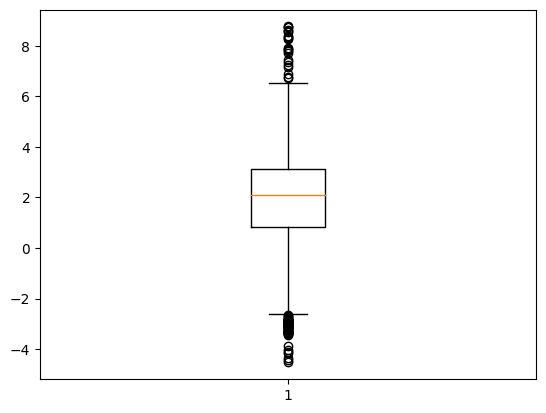

In [220]:
# Creating plot
# how to know how many outliers are in a dataset in python ?
plt.boxplot(data_model['I_error'])

Q1 = data_model['I_error'].quantile(0.25)  # 1st quartile
Q3 = data_model['I_error'].quantile(0.75)  # 3rd quartile
IQR = Q3 - Q1  # Interquartile range

# defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = data_model[(data_model['I_error'] < lower_bound) | (data_model['I_error'] > upper_bound)]
print('Number of outliers:', outliers.shape[0])
print('Outliers:')
print(outliers)

data_model = data_model[(data_model['I_error']>= lower_bound) & (data_model['I_error']<= upper_bound)]


In [221]:
data_model

,I,O,I_error,O_error,M1_error,M2_error,M3_error
341,5,35,-1.119639,14.055978,-0.184490,0.104427,0.092318
16144,25,175,4.859415,1.395087,-0.679499,0.149784,0.213819
22394,35,75,2.932579,2.857412,-0.218089,0.306643,-0.346270
24619,35,305,1.948882,-2.144828,-0.062737,-0.289956,0.184967
7215,15,5,-1.108212,-1.459986,-0.115816,0.028087,0.127173
...,...,...,...,...,...,...,...
596,5,55,-0.750794,18.660503,-0.199561,0.101047,0.103700
20818,30,285,2.506121,-2.106196,-0.124114,-0.304352,0.240312
9210,15,205,2.387287,1.963320,-0.260078,-0.079243,0.244004
10232,15,305,-0.461948,-4.287002,-0.135871,0.056443,0.098523


Number of outliers: 4765
Outliers:
      I    O   I_error    O_error  M1_error  M2_error  M3_error
683   5   65 -1.080032  20.635695 -0.214814  0.049168  0.176761
2339  5  235  1.151551 -27.609912 -0.319754  0.285651  0.019251
2632  5  265 -0.044609 -22.573493 -0.226229  0.173069  0.049863
2178  5  215  1.855250 -24.479865 -0.326473  0.320693 -0.019474
1378  5  135  1.814851  23.064431 -0.343338  0.056692  0.261930
...  ..  ...       ...        ...       ...       ...       ...
2700  5  275 -0.003036 -16.627192 -0.074808  0.043972  0.028575
1377  5  135  1.638473  30.291719 -0.356206 -0.027452  0.361038
1302  5  135  1.544238  36.755986 -0.374587 -0.100186  0.466690
2573  5  255  0.233239 -24.353880 -0.243746  0.204567  0.038603
596   5   55 -0.750794  18.660503 -0.199561  0.101047  0.103700

[4765 rows x 7 columns]


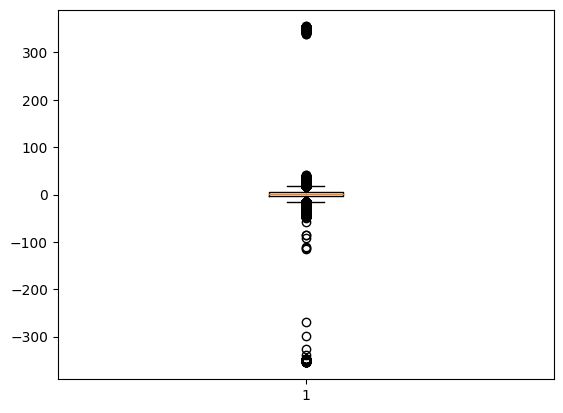

In [222]:
# Creating plot
plt.boxplot(data_model['O_error'])

Q1 = data_model['O_error'].quantile(0.25)  # 1st quartile
Q3 = data_model['O_error'].quantile(0.75)  # 3rd quartile
IQR = Q3 - Q1  # Interquartile range

# defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = data_model[(data_model['O_error'] < lower_bound) | (data_model['O_error'] > upper_bound)]
print('Number of outliers:', outliers.shape[0])
print('Outliers:')
print(outliers)

In [223]:
data_model = data_model[(data_model['O_error']>= lower_bound) & (data_model['O_error']<= upper_bound)]

In [224]:
data_model

,I,O,I_error,O_error,M1_error,M2_error,M3_error
341,5,35,-1.119639,14.055978,-0.184490,0.104427,0.092318
16144,25,175,4.859415,1.395087,-0.679499,0.149784,0.213819
22394,35,75,2.932579,2.857412,-0.218089,0.306643,-0.346270
24619,35,305,1.948882,-2.144828,-0.062737,-0.289956,0.184967
7215,15,5,-1.108212,-1.459986,-0.115816,0.028087,0.127173
...,...,...,...,...,...,...,...
10215,15,305,-0.533930,-5.937469,-0.184766,0.066135,0.139347
20818,30,285,2.506121,-2.106196,-0.124114,-0.304352,0.240312
9210,15,205,2.387287,1.963320,-0.260078,-0.079243,0.244004
10232,15,305,-0.461948,-4.287002,-0.135871,0.056443,0.098523


### Visualizing the distribution

(array([2.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 1.400e+01, 8.000e+00, 7.000e+00, 1.000e+01, 1.100e+01,
        1.100e+01, 1.400e+01, 2.000e+01, 1.900e+01, 1.300e+01, 1.600e+01,
        2.600e+01, 1.600e+01, 1.900e+01, 3.900e+01, 1.700e+01, 2.300e+01,
        3.400e+01, 2.400e+01, 2.300e+01, 3.600e+01, 4.200e+01, 3.200e+01,
        3.200e+01, 3.900e+01, 4.100e+01, 3.600e+01, 1.720e+02, 3.850e+02,
        3.190e+02, 5.710e+02, 8.000e+02, 7.610e+02, 8.010e+02, 1.519e+03,
        1.041e+03, 1.538e+03, 1.978e+03, 1.583e+03, 2.483e+03, 2.584e+03,
        2.831e+03, 4.131e+03, 4.446e+03, 5.808e+03, 6.540e+03, 6.364e+03,
        5.988e+03, 3.807e+03, 2.940e+03, 3.049e+03, 2.567e+03, 2.197e+03,
        1.628e+03, 1.690e+02, 8.400e+01, 7.300e+01, 5.300e+01, 5.700e+01,
        5.400e+01, 4.500e+01, 4.400e+01, 4.300e+01, 4.600e+01, 4.700e+01,
        2.800e+01, 3.400e+01, 5.100e+01, 3.200e+01, 3.100e+01, 2.500e+01,
        3.200e+01, 3.100e+01, 3.300e+0

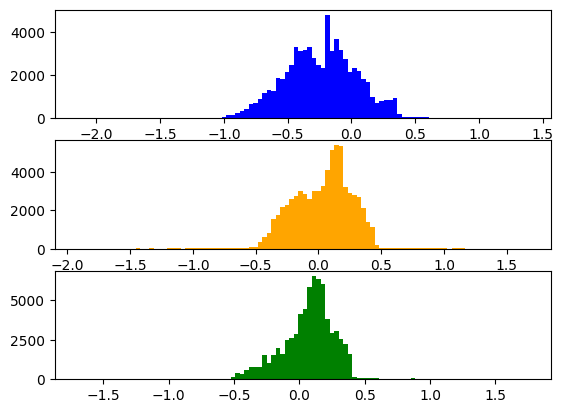

In [225]:
fig, axs = plt.subplots(3)
axs[0].hist(data_model['M1_error'], bins=100, label='Motor1_error', color='blue')
axs[1].hist(data_model['M2_error'], bins=100, label='Motor2_error', color='orange')
axs[2].hist(data_model['M3_error'], bins=100, label='Motor3_error', color='green')

# bar plot in matplotlib ?  

(array([ 183.,  153.,  283.,  264.,  453.,  606.,  472.,  588.,  563.,
         506.,  650.,  676.,  950., 1116., 1219., 1666., 1859., 2345.,
        2521., 2607., 2774., 3236., 3358., 3853., 3182., 2805., 2917.,
        2754., 3477., 2976., 2605., 2329., 2084., 1817., 1588., 1378.,
         930.,  953., 1021.,  737.,  468.,  792.,  852.,  638.,  395.,
         385.,  341.,  231.,  110.,   70.]),
 array([-15.74468628, -15.06897039, -14.39325451, -13.71753862,
        -13.04182273, -12.36610684, -11.69039096, -11.01467507,
        -10.33895918,  -9.66324329,  -8.98752741,  -8.31181152,
         -7.63609563,  -6.96037974,  -6.28466386,  -5.60894797,
         -4.93323208,  -4.25751619,  -3.5818003 ,  -2.90608442,
         -2.23036853,  -1.55465264,  -0.87893675,  -0.20322087,
          0.47249502,   1.14821091,   1.8239268 ,   2.49964268,
          3.17535857,   3.85107446,   4.52679035,   5.20250623,
          5.87822212,   6.55393801,   7.2296539 ,   7.90536978,
          8.58108567,   

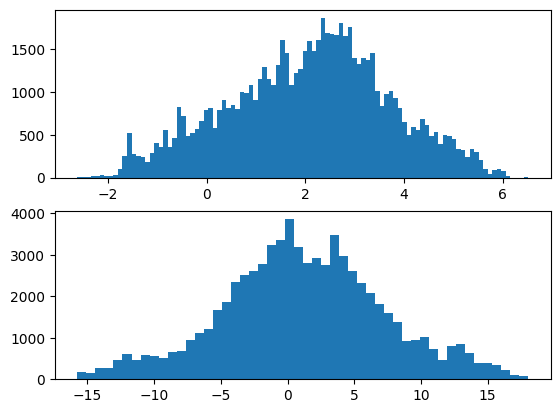

In [226]:
fig, axs = plt.subplots(2)
axs[0].hist(data_model['I_error'], bins=100, label='Motor1_error')
axs[1].hist(data_model['O_error'], bins=50, label='Motor1_error')

### Calculating the global mean and variance of the motors errors + Fit I,0,I_error and O_error to this global mean and variance 

In [227]:
mean_motor_error1 = np.mean(data_model['M1_error'])
mean_motor_error2 = np.mean(data_model['M2_error'])
mean_motor_error3 = np.mean(data_model['M3_error'])

std_motor_error1 = np.std(data_model['M1_error'])
std_motor_error2 = np.std(data_model['M2_error'])
std_motor_error3 = np.std(data_model['M3_error'])

mean_motors = (mean_motor_error1+mean_motor_error2+mean_motor_error3)/3
std_motors = (std_motor_error1+std_motor_error2+std_motor_error3)/3

In [228]:
print(mean_motors, std_motors)


-0.045458604279763254 0.2670333006545897


In [229]:
from sklearn.preprocessing import StandardScaler
incli = np.array(data_model['I']).reshape(-1,1)
incli = StandardScaler().fit_transform(incli)
incli_adjusted = incli * std_motors + mean_motors
data_model['I'] = incli_adjusted


/tmp/ipykernel_5528/3323842203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['I'] = incli_adjusted


(array([ 6386.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        10553.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        10727.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        10754.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10762.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10775.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10779.]),
 array([-0.49136197, -0.47460438, -0.45784679, -0.4410892 , -0.4243316 ,
        -0.40757401, -0.39081642, -0.37405882, -0.35730123, -0.34054364,
        -0.32378604, -0.30702845, -0.29027086, -0.27351327, -0.25675567,
        -0.23999808, -0.22324049, -0.20648289, -0.1897253 , -0.17296771,
        -0.15621011, -0.13945252, -0.12269493, -0.10593734, -0.08917974,
        -0.07242215, -0.05566456, -0.03890696, -0.02214937, -0.00539178,
         0.01136581,  0.02812341,  0.044881  ,  0.06163859,  0.07839619,
         0.09515378,  0.1119113

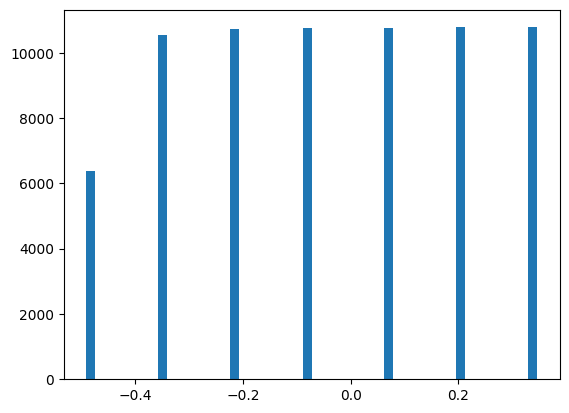

In [230]:
plt.hist(incli_adjusted, bins=50)

In [242]:
data_model['O'].max()

0.400712145019266

/tmp/ipykernel_5528/249889366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['O'] = orient_adjusted


(array([1814., 2064., 2094.,    0., 2098., 2095.,    0., 2008., 1906.,
        1884.,    0., 1879., 1877.,    0., 1875., 1873.,    0., 1877.,
        1885., 1909.,    0., 1992., 2091.,    0., 2096., 2093.,    0.,
        2050., 1903.,    0., 1901., 1896., 1888.,    0., 1885., 1887.,
           0., 1891., 1894., 1901.,    0., 1975., 1998.,    0., 2094.,
        2093.,    0., 2094., 2090., 1886.]),
 array([-0.49356256, -0.47567707, -0.45779157, -0.43990608, -0.42202058,
        -0.40413509, -0.3862496 , -0.3683641 , -0.35047861, -0.33259311,
        -0.31470762, -0.29682213, -0.27893663, -0.26105114, -0.24316564,
        -0.22528015, -0.20739466, -0.18950916, -0.17162367, -0.15373817,
        -0.13585268, -0.11796718, -0.10008169, -0.0821962 , -0.0643107 ,
        -0.04642521, -0.02853971, -0.01065422,  0.00723127,  0.02511677,
         0.04300226,  0.06088776,  0.07877325,  0.09665874,  0.11454424,
         0.13242973,  0.15031523,  0.16820072,  0.18608622,  0.20397171,
         0.22185

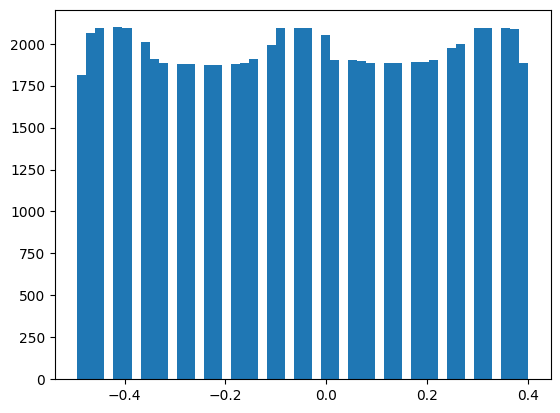

In [231]:
orient = np.array(data_model['O']).reshape(-1,1)
orient = StandardScaler().fit_transform(orient)
orient_adjusted = orient * std_motors + mean_motors
data_model['O'] = orient_adjusted
plt.hist(orient_adjusted, bins=50)

/tmp/ipykernel_5528/2106065394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['I_error'] = incli_error_adjusted


(array([1.400e+01, 3.500e+01, 5.600e+01, 3.600e+01, 1.340e+02, 7.760e+02,
        5.270e+02, 4.320e+02, 6.830e+02, 9.100e+02, 8.220e+02, 1.558e+03,
        1.007e+03, 1.225e+03, 1.607e+03, 1.370e+03, 1.732e+03, 1.663e+03,
        1.999e+03, 1.987e+03, 2.447e+03, 2.244e+03, 2.929e+03, 2.536e+03,
        2.504e+03, 3.079e+03, 3.091e+03, 3.562e+03, 3.356e+03, 3.464e+03,
        3.162e+03, 2.724e+03, 2.839e+03, 1.857e+03, 1.991e+03, 1.751e+03,
        1.150e+03, 1.152e+03, 1.296e+03, 1.023e+03, 8.870e+02, 9.300e+02,
        6.550e+02, 5.750e+02, 5.040e+02, 1.470e+02, 1.910e+02, 1.080e+02,
        3.000e+00, 6.000e+00]),
 array([-0.8080899 , -0.77837355, -0.7486572 , -0.71894086, -0.68922451,
        -0.65950817, -0.62979182, -0.60007548, -0.57035913, -0.54064279,
        -0.51092644, -0.4812101 , -0.45149375, -0.4217774 , -0.39206106,
        -0.36234471, -0.33262837, -0.30291202, -0.27319568, -0.24347933,
        -0.21376299, -0.18404664, -0.1543303 , -0.12461395, -0.0948976 ,
        -0.

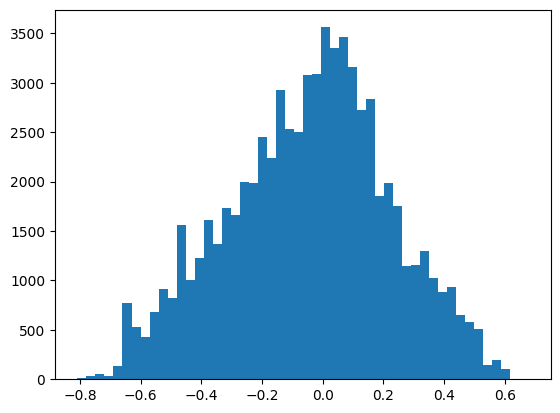

In [232]:
incli_error = np.array(data_model['I_error']).reshape(-1,1)
incli_error = StandardScaler().fit_transform(incli_error)
incli_error_adjusted = incli_error * std_motors + mean_motors
data_model['I_error'] = incli_error_adjusted
plt.hist(incli_error_adjusted, bins=50)

/tmp/ipykernel_5528/1440282732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['O_error'] = orient_error_adjusted


(array([ 183.,  153.,  283.,  264.,  453.,  606.,  472.,  588.,  563.,
         506.,  650.,  676.,  950., 1116., 1219., 1666., 1859., 2345.,
        2521., 2607., 2774., 3236., 3358., 3853., 3182., 2805., 2917.,
        2754., 3477., 2976., 2605., 2329., 2084., 1817., 1588., 1378.,
         930.,  953., 1021.,  737.,  468.,  792.,  852.,  638.,  395.,
         385.,  341.,  231.,  110.,   70.]),
 array([-0.77911889, -0.74980616, -0.72049343, -0.6911807 , -0.66186798,
        -0.63255525, -0.60324252, -0.57392979, -0.54461706, -0.51530434,
        -0.48599161, -0.45667888, -0.42736615, -0.39805342, -0.36874069,
        -0.33942797, -0.31011524, -0.28080251, -0.25148978, -0.22217705,
        -0.19286432, -0.1635516 , -0.13423887, -0.10492614, -0.07561341,
        -0.04630068, -0.01698796,  0.01232477,  0.0416375 ,  0.07095023,
         0.10026296,  0.12957569,  0.15888841,  0.18820114,  0.21751387,
         0.2468266 ,  0.27613933,  0.30545205,  0.33476478,  0.36407751,
         0.39339

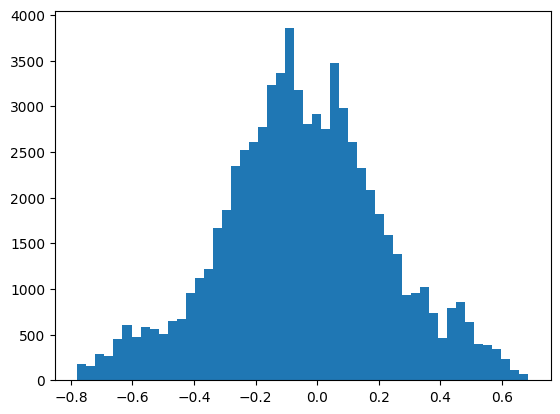

In [233]:
orient_error = np.array(data_model['O_error']).reshape(-1,1)
orient_error = StandardScaler().fit_transform(orient_error)
orient_error_adjusted = orient_error * std_motors + mean_motors
data_model['O_error'] = orient_error_adjusted
plt.hist(orient_error_adjusted, bins=50)

In [160]:
data_model['I']

22796    35
24136    35
24558    35
23978    35
22025    35
         ..
9915     15
5012     10
11709    20
18134    30
4110     10
Name: I, Length: 70736, dtype: int64

In [163]:
'''data_model['I'] = [(i - mean_motors) / std_motors for i in data_model['I']]
DOES NOT WORK BECAUSE IT SCALES UP TO MUCH THE ANGLES std = 0.26'''

/tmp/ipykernel_5528/4292559868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['I'] = [(i - mean_motors) / std_motors for i in data_model['I']]


In [164]:
data_model['I']

22796    131.240031
24136    131.240031
24558    131.240031
23978    131.240031
22025    131.240031
            ...    
9915      56.343005
5012      37.618749
11709     75.067261
18134    112.515774
4110      37.618749
Name: I, Length: 70736, dtype: float64

In [234]:
data_model

,I,O,I_error,O_error,M1_error,M2_error,M3_error
341,-0.491362,-0.416910,-0.563810,0.513642,-0.184490,0.104427,0.092318
16144,0.067224,-0.059201,0.407457,-0.035591,-0.679499,0.149784,0.213819
22394,0.346518,-0.314708,0.094452,0.027845,-0.218089,0.306643,-0.346270
24619,0.346518,0.272959,-0.065344,-0.189154,-0.062737,-0.289956,0.184967
7215,-0.212069,-0.493563,-0.561954,-0.159445,-0.115816,0.028087,0.127173
...,...,...,...,...,...,...,...
10215,-0.212069,0.272959,-0.468664,-0.353679,-0.184766,0.066135,0.139347
20818,0.206871,0.221857,0.025177,-0.187478,-0.124114,-0.304352,0.240312
9210,-0.212069,0.017452,0.005873,-0.010941,-0.260078,-0.079243,0.244004
10232,-0.212069,0.272959,-0.456971,-0.282082,-0.135871,0.056443,0.098523


(array([5.000e+00, 9.000e+00, 1.000e+01, 2.500e+01, 2.300e+01, 3.300e+01,
        1.800e+01, 1.800e+01, 3.400e+01, 1.000e+02, 2.570e+02, 5.190e+02,
        2.740e+02, 2.530e+02, 2.460e+02, 1.860e+02, 2.830e+02, 4.000e+02,
        3.540e+02, 5.560e+02, 3.600e+02, 4.620e+02, 8.320e+02, 7.260e+02,
        4.880e+02, 5.190e+02, 5.680e+02, 6.570e+02, 7.900e+02, 8.170e+02,
        5.810e+02, 7.890e+02, 9.140e+02, 8.180e+02, 8.550e+02, 8.080e+02,
        1.003e+03, 9.960e+02, 1.078e+03, 9.090e+02, 1.150e+03, 1.297e+03,
        1.157e+03, 1.087e+03, 1.322e+03, 1.607e+03, 1.456e+03, 1.080e+03,
        1.229e+03, 1.275e+03, 1.484e+03, 1.595e+03, 1.476e+03, 1.615e+03,
        1.871e+03, 1.691e+03, 1.683e+03, 1.673e+03, 1.804e+03, 1.660e+03,
        1.764e+03, 1.398e+03, 1.326e+03, 1.398e+03, 1.380e+03, 1.459e+03,
        1.015e+03, 8.420e+02, 9.740e+02, 1.017e+03, 9.370e+02, 8.140e+02,
        6.460e+02, 5.040e+02, 5.970e+02, 5.550e+02, 6.820e+02, 6.140e+02,
        4.880e+02, 5.350e+02, 3.890e+0

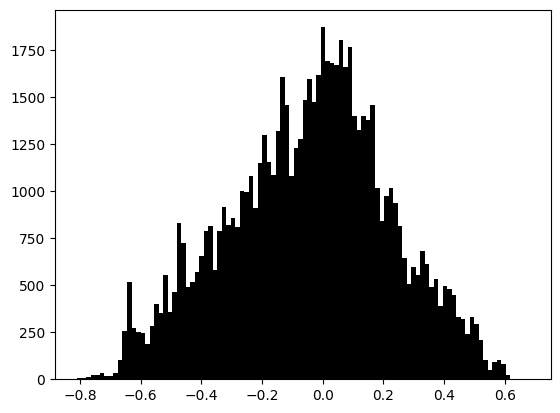

In [252]:
plt.hist(data_model['I_error'], bins=100, label='I_error', color='black')

### Train process

In [253]:
'''from sklearn.preprocessing import Normalizer

from sklearn.utils import shuffle 
X, y = shuffle(X, y, random_state=13)
i = 0

plt.figure(figsize=(20,15))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler_x = Normalizer().fit(X)
scaler_y = Normalizer().fit(y)

X_train_norm = scaler_x.transform(X_train)
X_test_norm = scaler_x.transform(X_test)'''

# Parameter of train test split function for having balance data in train test split?
from sklearn.utils import shuffle 
X = data_model.iloc[:,:4]
y = data_model.iloc[:,4:]

#X, y = shuffle(X, y, random_state=13)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [254]:
'''
- 3 datasets
- entradas: I_target, O_target, I_error, O_error
- salidas: errores de theta
'''
from sklearn.model_selection import GridSearchCV

params = {'activation': ['relu', 'tanh', 'logistic'],
          'hidden_layer_sizes': [(50,50,50,50), (50,75,100,125), (100,100,100,100)],
          'solver': ['adam', 'sgd'],
          'learning_rate' : ['constant', 'adaptive']
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=constant, solver=adam;, score=0.986 total time=   9.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.989 total time=   8.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=constant, solver=adam;, score=0.989 total time=   8.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=constant, solver=adam;, score=0.988 total time=   8.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.988 total time=   8.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=constant, solver=adam;, score=0.989 total time=   8.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(50, 50, 50, 50), learning_rate=constant, solver=adam;, score=0.988 total

In [261]:

model2 = MLPRegressor(activation='relu', 
                      hidden_layer_sizes=(50,75,100,125), 
                      learning_rate ='constant', 
                      solver = 'adam', 
                      max_iter=10)

model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))

'''
while True:
  i += 1
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)
  model.fit(X_train.values, y_train)
  print(model.score(X_test, y_test))
  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')
  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')
  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))
  if model.score(X_test, y_test) > 0.9:
    break

plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'lower right')
plt.show()
'''

0.9920041549261723


/home/sofia/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


"\nwhile True:\n  i += 1\n  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)\n  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)\n  model.fit(X_train.values, y_train)\n  print(model.score(X_test, y_test))\n  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')\n  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')\n  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))\n  if model.score(X_test, y_test) > 0.9:\n    break\n\nplt.xlabel('')\nplt.ylabel('')\nplt.legend(loc = 'lower right')\nplt.show()\n"

In [294]:
values_to_predict = np.array([20, 145, 4, 5]).reshape(-1,1)

In [305]:
values_to_predict_trans = StandardScaler().fit_transform(values_to_predict)
values_to_predict_trans_ad = (values_to_predict_trans * std_motors + mean_motors).reshape(1,-1)

In [299]:
values_to_predict_trans_ad
values_to_predict_trans

array([[-0.39869182],
       [ 1.72200937],
       [-0.67014158],
       [-0.65317597]])

In [269]:
#values_to_predict = np.array(values_to_predict)

In [270]:
#values_to_predict = values_to_predict.flatten() 

In [259]:
#values_to_predict = [[math.radians(i) for i in values_to_predict]]

In [306]:
model2.predict(values_to_predict_trans_ad)

/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([[ 0.10535504, -0.16885657,  0.01723414]])

In [307]:
import joblib  
joblib.dump(model2, '/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V7.pkl') # with the I,O,I_error and O_error normalized with mu and std motors errors

['/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V7.pkl']

### MLP Motor 1

In [129]:
X_motor1 = data_model.iloc[:,:4]
y_motor1 = data_model.iloc[:,4]

In [130]:

X_motor1, y_motor1 = shuffle(X_motor1, y_motor1, random_state=13)
X_train_motor1, X_test_motor1, y_train_motor1, y_test_motor1 = train_test_split(X_motor1, y_motor1, test_size=0.3, random_state=0)


scaler_x_motor1 = Normalizer().fit(X_motor1)

X_train_norm_motor1 = scaler_x_motor1.fit_transform(X_train_motor1)
X_test_norm_motor1 = scaler_x_motor1.transform(X_test_motor1)

# y_train_norm = scaler_y.transform(y_train_motor1)
# y_test_norm = scaler_y.transform(y_test)

In [131]:

model_motor1= MLPRegressor(activation='relu', 
                      hidden_layer_sizes=(100, 100, 100, 100), 
                      learning_rate ='constant', 
                      solver = 'adam', 
                      max_iter=1000)

model_motor1.fit(X_train_norm_motor1, y_train_motor1)
print(model_motor1.score(X_test_norm_motor1, y_test_motor1))

'''
while True:
  i += 1
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)
  model.fit(X_train.values, y_train)
  print(model.score(X_test, y_test))
  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')
  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')
  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))
  if model.score(X_test, y_test) > 0.9:
    break

plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'lower right')
plt.show()
'''

0.8948250353958154


"\nwhile True:\n  i += 1\n  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)\n  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)\n  model.fit(X_train.values, y_train)\n  print(model.score(X_test, y_test))\n  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')\n  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')\n  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))\n  if model.score(X_test, y_test) > 0.9:\n    break\n\nplt.xlabel('')\nplt.ylabel('')\nplt.legend(loc = 'lower right')\nplt.show()\n"

In [132]:
values_to_predict = [[20, 145, 4, 5]]

In [133]:
values_to_predict = np.array(values_to_predict)

In [134]:
values_to_predict = scaler_x_motor1.transform(values_to_predict)
len(values_to_predict)

/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


1

In [135]:
model_motor1.predict(values_to_predict)

array([-0.54019809])

In [119]:
model_motor1.predict([[20, 145, 4, 6]])

array([19.43728144])

### MLP Motor 2

In [136]:
X_motor2 = data_model.iloc[:,:4]
y_motor2 = data_model.iloc[:,4]

In [137]:

X_motor2, y_motor2 = shuffle(X_motor2, y_motor2, random_state=13)
X_train_motor2, X_test_motor2, y_train_motor2, y_test_motor2 = train_test_split(X_motor2, y_motor2, test_size=0.3, random_state=0)


scaler_x_motor2 = Normalizer().fit(X_motor2)

X_train_norm_motor2 = scaler_x_motor2.fit_transform(X_train_motor2)
X_test_norm_motor2 = scaler_x_motor2.transform(X_test_motor2)

# y_train_norm = scaler_y.transform(y_train_motor1)
# y_test_norm = scaler_y.transform(y_test)

In [138]:

model_motor2= MLPRegressor(activation='relu', 
                      hidden_layer_sizes=(100, 100, 100, 100), 
                      learning_rate ='constant', 
                      solver = 'adam', 
                      max_iter=1000)

model_motor2.fit(X_train_norm_motor2, y_train_motor2)
print(model_motor2.score(X_test_norm_motor2, y_test_motor2))

'''
while True:
  i += 1
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)
  model.fit(X_train.values, y_train)
  print(model.score(X_test, y_test))
  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')
  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')
  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))
  if model.score(X_test, y_test) > 0.9:
    break

plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'lower right')
plt.show()
'''

0.9118232878036288


"\nwhile True:\n  i += 1\n  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)\n  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)\n  model.fit(X_train.values, y_train)\n  print(model.score(X_test, y_test))\n  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')\n  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')\n  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))\n  if model.score(X_test, y_test) > 0.9:\n    break\n\nplt.xlabel('')\nplt.ylabel('')\nplt.legend(loc = 'lower right')\nplt.show()\n"

In [139]:
values_to_predict = [[20, 145, 4, 5]]

In [140]:
values_to_predict = np.array(values_to_predict)

In [141]:
values_to_predict = scaler_x_motor2.transform(values_to_predict)
len(values_to_predict)

/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


1

In [142]:
model_motor2.predict(values_to_predict)

array([-0.60284006])

In [143]:
model_motor2.predict([[20, 145, 4, 6]])

array([12.26499602])

In [144]:
# Saving the model
import joblib  
joblib.dump(model_motor2, '/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V5_motor2.pkl')

['/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V5_motor2.pkl']

### MLP Motor 3

In [145]:
X_motor3 = data_model.iloc[:,:4]
y_motor3 = data_model.iloc[:,4]

In [146]:

X_motor3, y_motor3 = shuffle(X_motor3, y_motor3, random_state=13)
X_train_motor3, X_test_motor3, y_train_motor3, y_test_motor3 = train_test_split(X_motor3, y_motor3, test_size=0.3, random_state=0)


scaler_x_motor3 = Normalizer().fit(X_motor3)

X_train_norm_motor3 = scaler_x_motor3.fit_transform(X_train_motor3)
X_test_norm_motor3 = scaler_x_motor3.transform(X_test_motor3)

# y_train_norm = scaler_y.transform(y_train_motor1)
# y_test_norm = scaler_y.transform(y_test)

In [147]:

model_motor3= MLPRegressor(activation='relu', 
                      hidden_layer_sizes=(100, 100, 100, 100), 
                      learning_rate ='constant', 
                      solver = 'adam', 
                      max_iter=1000)

model_motor3.fit(X_train_norm_motor3, y_train_motor3)
print(model_motor3.score(X_test_norm_motor3, y_test_motor3))

'''
while True:
  i += 1
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)
  model.fit(X_train.values, y_train)
  print(model.score(X_test, y_test))
  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')
  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')
  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))
  if model.score(X_test, y_test) > 0.9:
    break

plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'lower right')
plt.show()
'''

0.890615261023293


"\nwhile True:\n  i += 1\n  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)\n  model = MLPRegressor(activation='logistic', hidden_layer_sizes=(5,5,5), max_iter=600)\n  model.fit(X_train.values, y_train)\n  print(model.score(X_test, y_test))\n  #plt.scatter(X_train, y_train.iloc[:,:2], color = 'orange', label = 'Training Set' if i == 1 else '')\n  #plt.scatter(X_test, y_test.iloc[:,:2], color = 'green', label = 'Test Set' if i == 1 else '')\n  #plt.scatter(X, model.predict(X)[:,:2], label = 'Iteration' + str(i))\n  if model.score(X_test, y_test) > 0.9:\n    break\n\nplt.xlabel('')\nplt.ylabel('')\nplt.legend(loc = 'lower right')\nplt.show()\n"

In [148]:
values_to_predict = [[20, 145, 4, 5]]

In [149]:
values_to_predict = np.array(values_to_predict)

In [150]:
values_to_predict = scaler_x_motor3.transform(values_to_predict)
len(values_to_predict)

/home/sofia/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


1

In [151]:
model_motor3.predict(values_to_predict)

array([-0.52120549])

In [153]:
model_motor3.predict([[20, 145, 4, 6]])

array([-3.91502226])

In [154]:
# Saving the model
import joblib  
joblib.dump(model_motor2, '/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V5_motor3.pkl')

['/home/sofia/SOFIA_Python/ml/TFM/trained_error_motors_MASTER_V5_motor3.pkl']